# Detector de Semáforos usando Segmentación por Color

Este notebook implementa un detector de semáforos que utiliza segmentación por color HSV para identificar las luces rojas, amarillas y verdes, y determinar automáticamente el estado del semáforo.

## Objetivos:
- Detectar luces rojas, amarillas y verdes por separado
- Determinar el estado del semáforo automáticamente
- Bonus: Conteo de píxeles para determinar si la luz está encendida o apagada

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Configuración para mostrar imágenes en el notebook
%matplotlib inline

## Paso 1: Cargar la imagen del semáforo

Cargamos la imagen proporcionada y la convertimos al espacio de color HSV para la segmentación.

Imagen cargada exitosamente. Dimensiones: (183, 275, 3)


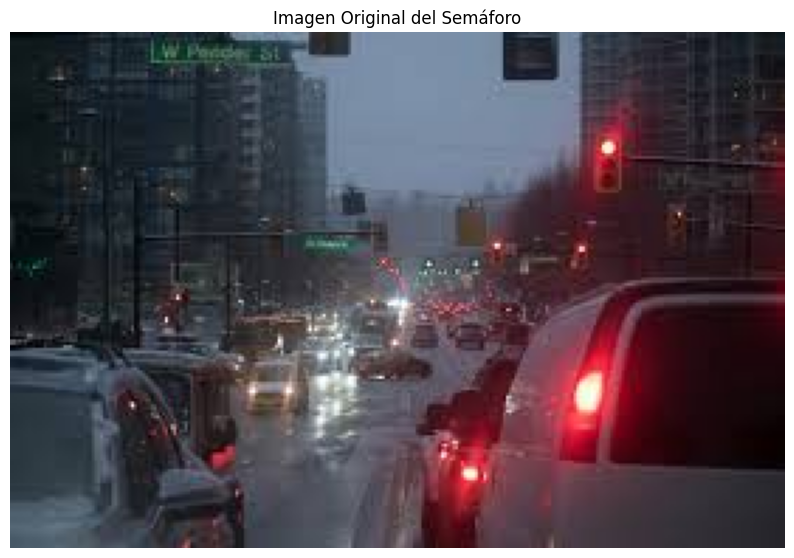

In [2]:
# Cargar la imagen del semáforo
imagen_bgr = cv2.imread('images.jpg')

if imagen_bgr is None:
    print("Error: No se pudo cargar la imagen. Verifica que el archivo 'images.jpg' exista.")
    exit()

# Convertir de BGR a RGB para visualización correcta con matplotlib
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

# Convertir a HSV para segmentación por color
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

print(f"Imagen cargada exitosamente. Dimensiones: {imagen_rgb.shape}")

# Mostrar la imagen original
plt.figure(figsize=(10, 8))
plt.imshow(imagen_rgb)
plt.title('Imagen Original del Semáforo')
plt.axis('off')
plt.show()

## Paso 2: Definir rangos HSV para las luces del semáforo

Definimos los rangos HSV para detectar:
- **Rojo**: Dos rangos debido a la circularidad del espacio HSV
- **Amarillo**: Rango único
- **Verde**: Rango único

Los valores están ajustados para luces de semáforo típicas.

In [3]:
# Rangos HSV para las luces del semáforo

# ROJO - Dos rangos debido a la circularidad del espacio HSV
# Rango 1: Rojo inicial (0-10 grados)
rojo_bajo_1 = np.array([0, 100, 100])      # H: 0-10, S: alta saturación, V: brillo mínimo
rojo_alto_1 = np.array([10, 255, 255])     # H: máximo del primer rango

# Rango 2: Rojo final (170-180 grados)
rojo_bajo_2 = np.array([170, 100, 100])    # H: 170-180, mismos S y V
rojo_alto_2 = np.array([180, 255, 255])

# AMARILLO
amarillo_bajo = np.array([20, 100, 100])   # H: alrededor de 30 grados para amarillo
amarillo_alto = np.array([40, 255, 255])

# VERDE
verde_bajo = np.array([40, 50, 50])        # H: alrededor de 60 grados para verde
verde_alto = np.array([80, 255, 255])

print("Rangos HSV definidos para la detección de semáforos:")
print(f"Rojo 1: {rojo_bajo_1} - {rojo_alto_1}")
print(f"Rojo 2: {rojo_bajo_2} - {rojo_alto_2}")
print(f"Amarillo: {amarillo_bajo} - {amarillo_alto}")
print(f"Verde: {verde_bajo} - {verde_alto}")

Rangos HSV definidos para la detección de semáforos:
Rojo 1: [  0 100 100] - [ 10 255 255]
Rojo 2: [170 100 100] - [180 255 255]
Amarillo: [ 20 100 100] - [ 40 255 255]
Verde: [40 50 50] - [ 80 255 255]


## Paso 3: Crear máscaras de segmentación

Creamos máscaras binarias para cada color usando `cv2.inRange()`.

In [4]:
# Crear máscaras para cada color

# Máscaras para rojo (combinar ambos rangos)
mascara_roja_1 = cv2.inRange(imagen_hsv, rojo_bajo_1, rojo_alto_1)
mascara_roja_2 = cv2.inRange(imagen_hsv, rojo_bajo_2, rojo_alto_2)
mascara_roja = cv2.bitwise_or(mascara_roja_1, mascara_roja_2)

# Máscara para amarillo
mascara_amarilla = cv2.inRange(imagen_hsv, amarillo_bajo, amarillo_alto)

# Máscara para verde
mascara_verde = cv2.inRange(imagen_hsv, verde_bajo, verde_alto)

print("Máscaras de segmentación creadas exitosamente")

Máscaras de segmentación creadas exitosamente


## Paso 4: Aplicar las máscaras y contar píxeles

Aplicamos las máscaras a la imagen original y contamos los píxeles detectados para determinar si cada luz está encendida.

In [5]:
# Función para contar píxeles y determinar si la luz está encendida
def analizar_luz(mascara, nombre_color, umbral_minimo=50):
    """
    Analiza una máscara para determinar si la luz correspondiente está encendida.
    
    Parámetros:
    - mascara: Máscara binaria del color
    - nombre_color: Nombre del color para mostrar en resultados
    - umbral_minimo: Número mínimo de píxeles para considerar la luz encendida
    
    Retorna:
    - encendida: True si la luz está encendida
    - pixeles_detectados: Número de píxeles detectados
    - imagen_segmentada: Imagen con solo el color detectado
    """
    # Contar píxeles blancos (255) en la máscara
    pixeles_detectados = cv2.countNonZero(mascara)
    
    # Determinar si está encendida basado en el umbral
    encendida = pixeles_detectados > umbral_minimo
    
    # Crear imagen segmentada
    imagen_segmentada = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara)
    
    print(f"{nombre_color}: {pixeles_detectados} píxeles detectados - {'ENCENDIDA' if encendida else 'APAGADA'}")
    
    return encendida, pixeles_detectados, imagen_segmentada

# Analizar cada luz del semáforo
print("\n=== ANÁLISIS DE LAS LUCES DEL SEMÁFORO ===\n")

rojo_encendido, rojo_pixeles, imagen_roja = analizar_luz(mascara_roja, "LUZ ROJA")
amarillo_encendido, amarillo_pixeles, imagen_amarilla = analizar_luz(mascara_amarilla, "LUZ AMARILLA")
verde_encendido, verde_pixeles, imagen_verde = analizar_luz(mascara_verde, "LUZ VERDE")


=== ANÁLISIS DE LAS LUCES DEL SEMÁFORO ===

LUZ ROJA: 3366 píxeles detectados - ENCENDIDA
LUZ AMARILLA: 0 píxeles detectados - APAGADA
LUZ VERDE: 189 píxeles detectados - ENCENDIDA


## Paso 5: Determinar el estado del semáforo

Basado en las luces detectadas, determinamos el estado actual del semáforo.

In [6]:
# Determinar el estado del semáforo
def determinar_estado_semaforo(rojo, amarillo, verde):
    """
    Determina el estado del semáforo basado en las luces encendidas.
    
    Parámetros:
    - rojo, amarillo, verde: Booleanos indicando si cada luz está encendida
    
    Retorna:
    - estado: String con el estado del semáforo
    """
    if rojo and not amarillo and not verde:
        return "🚫 DETENTE - Semáforo en ROJO"
    elif not rojo and amarillo and not verde:
        return "⚠️  PRECAUCIÓN - Semáforo en AMARILLO"
    elif not rojo and not amarillo and verde:
        return "✅ AVANZA - Semáforo en VERDE"
    elif rojo and amarillo and not verde:
        return "🚫 DETENTE - Semáforo en ROJO/AMARILLO (preparación para verde)"
    elif not rojo and not amarillo and not verde:
        return "❓ ESTADO DESCONOCIDO - Ninguna luz detectada claramente"
    else:
        return "❓ ESTADO DESCONOCIDO - Combinación inusual de luces"

# Determinar y mostrar el estado
estado_semaforo = determinar_estado_semaforo(rojo_encendido, amarillo_encendido, verde_encendido)

print("\n" + "="*50)
print("🎯 RESULTADO FINAL DEL ANÁLISIS")
print("="*50)
print(f"\n{estado_semaforo}")
print("\n📊 Resumen de detección:")
print(f"   🔴 Rojo: {'ON' if rojo_encendido else 'OFF'} ({rojo_pixeles} píxeles)")
print(f"   🟡 Amarillo: {'ON' if amarillo_encendido else 'OFF'} ({amarillo_pixeles} píxeles)")
print(f"   🟢 Verde: {'ON' if verde_encendido else 'OFF'} ({verde_pixeles} píxeles)")


🎯 RESULTADO FINAL DEL ANÁLISIS

❓ ESTADO DESCONOCIDO - Combinación inusual de luces

📊 Resumen de detección:
   🔴 Rojo: ON (3366 píxeles)
   🟡 Amarillo: OFF (0 píxeles)
   🟢 Verde: ON (189 píxeles)


## Paso 6: Visualización de resultados

Mostramos las imágenes segmentadas y las máscaras para verificar la detección.

C:\Users\jordi\AppData\Local\Temp\ipykernel_18960\1768585559.py:74: UserWarning: Glyph 10067 (\N{BLACK QUESTION MARK ORNAMENT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jordi\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10067 (\N{BLACK QUESTION MARK ORNAMENT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


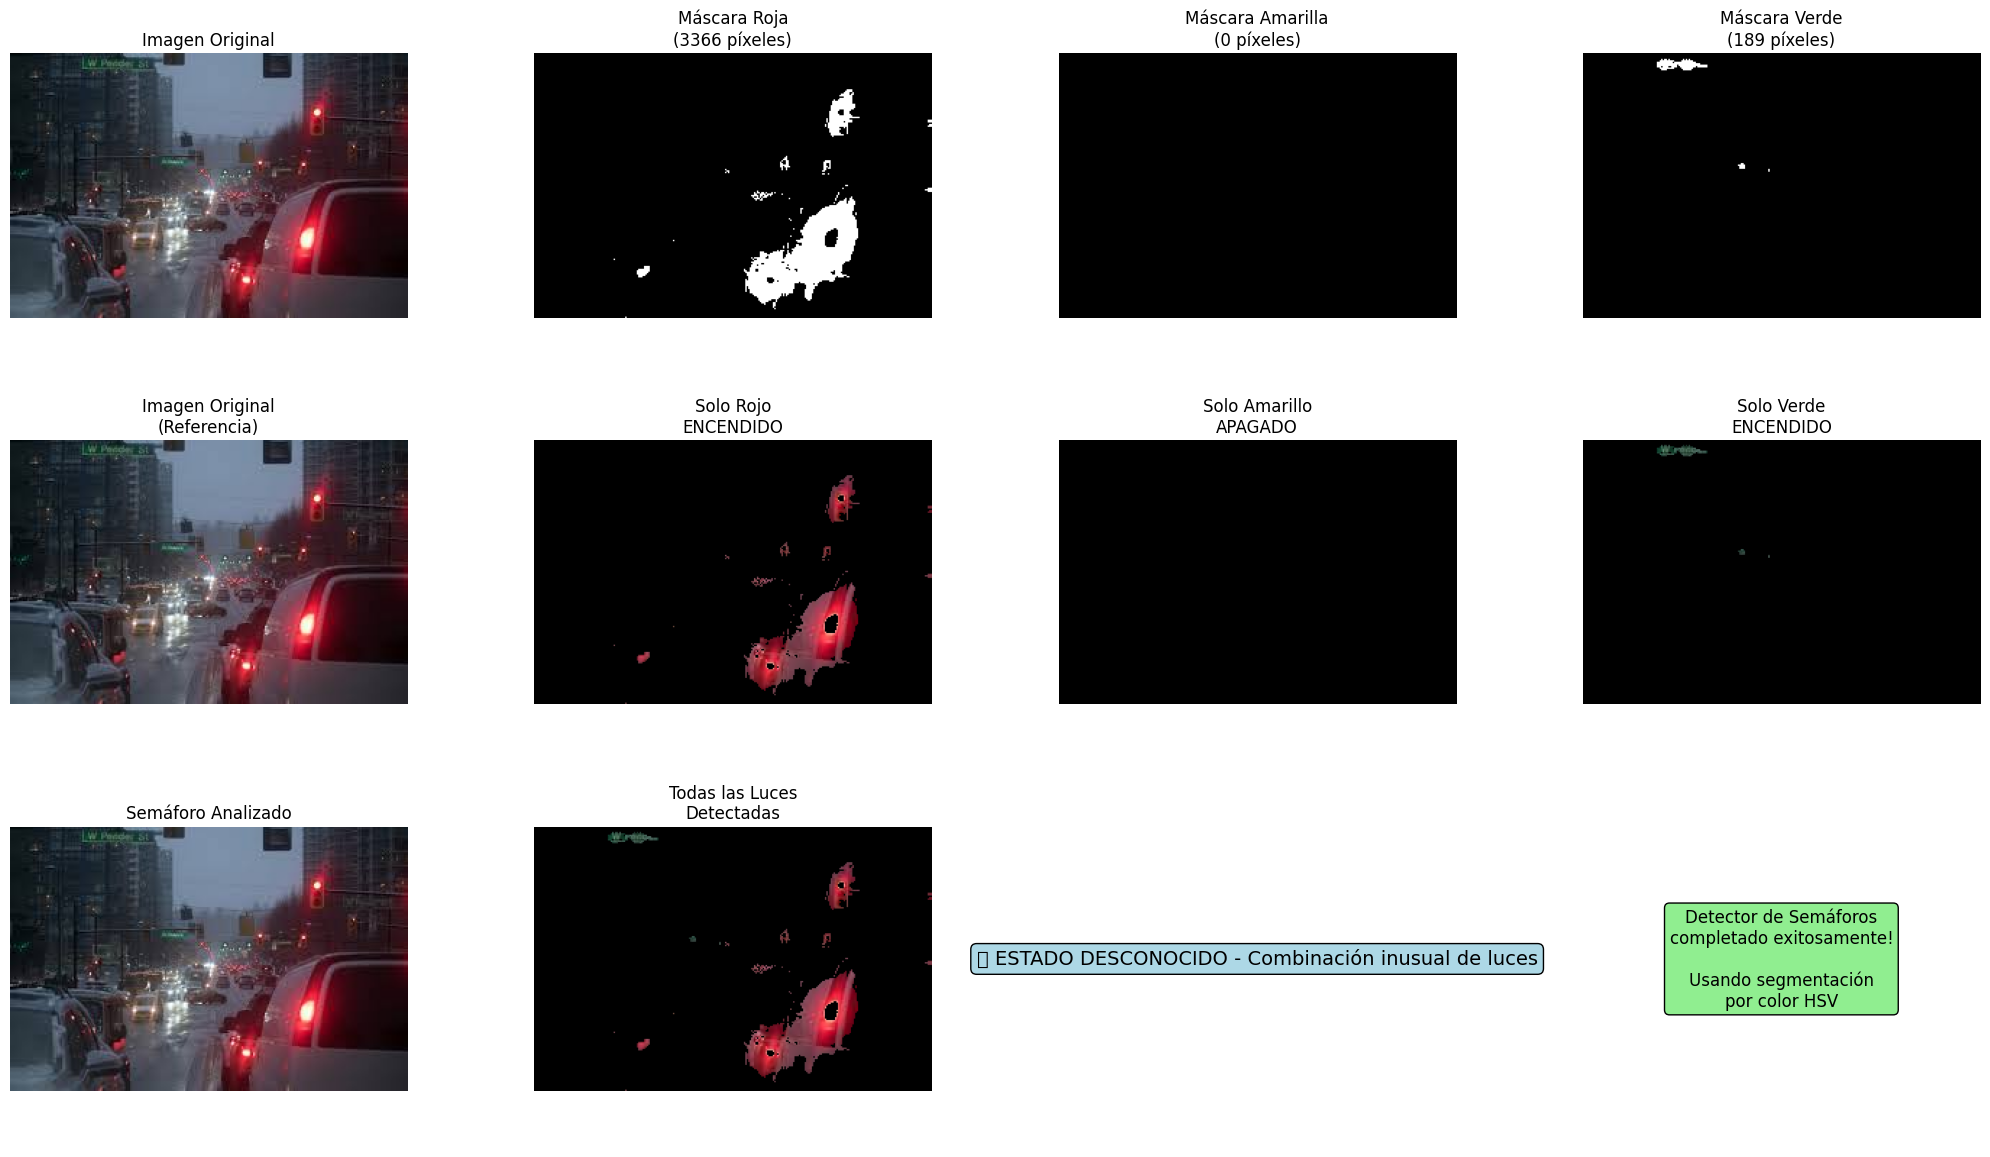


✅ DETECTOR DE SEMÁFOROS COMPLETADO EXITOSAMENTE

🎯 El sistema ha analizado la imagen y determinado el estado del semáforo
🔍 usando segmentación por color HSV y conteo de píxeles.

💡 Este detector puede ser extendido para:
   • Procesamiento de video en tiempo real
   • Integración con sistemas de vehículos autónomos
   • Detección de múltiples semáforos en una escena
   • Mejora de precisión con machine learning


In [7]:
# Crear visualización completa de resultados
plt.figure(figsize=(20, 12))

# Fila 1: Imagen original y máscaras
plt.subplot(3, 4, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original', fontsize=12)
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(mascara_roja, cmap='gray')
plt.title(f'Máscara Roja\n({rojo_pixeles} píxeles)', fontsize=12)
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(mascara_amarilla, cmap='gray')
plt.title(f'Máscara Amarilla\n({amarillo_pixeles} píxeles)', fontsize=12)
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(mascara_verde, cmap='gray')
plt.title(f'Máscara Verde\n({verde_pixeles} píxeles)', fontsize=12)
plt.axis('off')

# Fila 2: Imágenes segmentadas
plt.subplot(3, 4, 5)
plt.imshow(imagen_rgb)
plt.title('Imagen Original\n(Referencia)', fontsize=12)
plt.axis('off')

plt.subplot(3, 4, 6)
plt.imshow(imagen_roja)
plt.title(f'Solo Rojo\n{"ENCENDIDO" if rojo_encendido else "APAGADO"}', fontsize=12)
plt.axis('off')

plt.subplot(3, 4, 7)
plt.imshow(imagen_amarilla)
plt.title(f'Solo Amarillo\n{"ENCENDIDO" if amarillo_encendido else "APAGADO"}', fontsize=12)
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(imagen_verde)
plt.title(f'Solo Verde\n{"ENCENDIDO" if verde_encendido else "APAGADO"}', fontsize=12)
plt.axis('off')

# Fila 3: Resultado final con estado del semáforo
plt.subplot(3, 4, 9)
plt.imshow(imagen_rgb)
plt.title('Semáforo Analizado', fontsize=12)
plt.axis('off')

# Crear una imagen combinada de todas las detecciones
mascara_combinada = cv2.bitwise_or(cv2.bitwise_or(mascara_roja, mascara_amarilla), mascara_verde)
imagen_combinada = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_combinada)

plt.subplot(3, 4, 10)
plt.imshow(imagen_combinada)
plt.title('Todas las Luces\nDetectadas', fontsize=12)
plt.axis('off')

# Espacios vacíos para completar el grid
plt.subplot(3, 4, 11)
plt.text(0.5, 0.5, f"{estado_semaforo}", 
         ha='center', va='center', fontsize=14, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
plt.axis('off')

plt.subplot(3, 4, 12)
plt.text(0.5, 0.5, "Detector de Semáforos\ncompletado exitosamente!\n\nUsando segmentación\npor color HSV", 
         ha='center', va='center', fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("✅ DETECTOR DE SEMÁFOROS COMPLETADO EXITOSAMENTE")
print("="*60)
print("\n🎯 El sistema ha analizado la imagen y determinado el estado del semáforo")
print("🔍 usando segmentación por color HSV y conteo de píxeles.")
print("\n💡 Este detector puede ser extendido para:")
print("   • Procesamiento de video en tiempo real")
print("   • Integración con sistemas de vehículos autónomos")
print("   • Detección de múltiples semáforos en una escena")
print("   • Mejora de precisión con machine learning")